# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes.


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever).


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/datasets/ealaxi/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Just a first look
df = pd.read_csv("/PS_20174392719_1491204439457_log.csv")
sample = df.sample(100000)
sample.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
251624,14,PAYMENT,3229.29,C294223571,0.0,0.0,M2113985372,0.00,0.00,0.0,0.0
385062,17,PAYMENT,19036.88,C2107114068,5639.0,0.0,M384092134,0.00,0.00,0.0,0.0
391504,17,PAYMENT,11626.88,C177162832,0.0,0.0,M476808705,0.00,0.00,0.0,0.0
119204,11,PAYMENT,15820.53,C41067616,0.0,0.0,M1928968864,0.00,0.00,0.0,0.0
129295,11,CASH_OUT,141208.82,C1190920182,62486.0,0.0,C1414963218,764252.95,1308463.31,0.0,0.0


In [ ]:
# Taking a look at the shape of the dataset and checking for categorical/numerical
print(f"The actual shape of my data is {sample.shape[0]} rows and {sample.shape[1]} columns")

The actual shape of my data is 100000 rows and 11 columns


In [ ]:
# Just out of curiosity, these last columns might contain my target, just by checking the unique
print(sample["isFraud"].unique())  # this will be my target, most likely
print(sample["isFlaggedFraud"].unique())

[0. 1.]
[0.]


0.0    99947
1.0       53
Name: isFraud, dtype: int64


<Axes: >

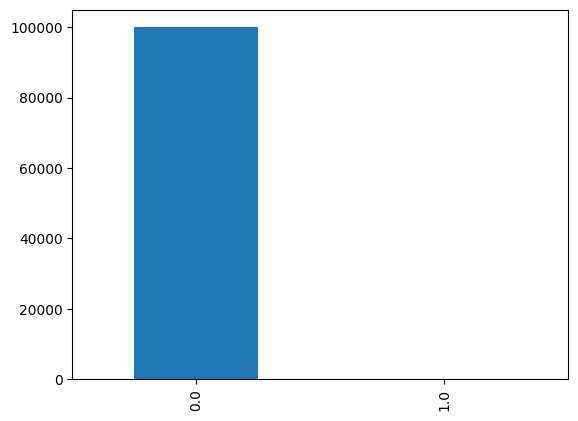

In [ ]:
# If it's what I am thinking, 2 out of 1000 are fraud? Maybe. Let's sit back and enjoy the show
print(sample["isFraud"].value_counts())
sample["isFraud"].value_counts().plot(kind = "bar")

In [ ]:
# Checking for statistics. I can see the "only 2" fraud cases in the mean of isFraud. The rest is a bit foggy for me.
sample.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.0
mean,13.793930,1.672580e+05,9.083691e+05,9.284839e+05,9.872217e+05,1.171648e+06,0.000530,0.0
std,3.662865,2.737220e+05,3.003058e+06,3.040327e+06,2.354548e+06,2.539133e+06,0.023016,0.0
min,1.000000,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,11.000000,1.326794e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,14.000000,8.114545e+04,1.803700e+04,0.000000e+00,1.177247e+05,2.234951e+05,0.000000,0.0
75%,17.000000,2.240173e+05,1.688683e+05,2.113392e+05,9.029070e+05,1.214240e+06,0.000000,0.0
max,19.000000,1.000000e+07,3.836475e+07,3.844183e+07,4.133844e+07,4.138365e+07,1.000000,0.0


### What is the distribution of the outcome?

In [ ]:
# If the question is related to the outcome variable "isFraud" (if a transaction is fraudulent or not and atribioting (fraud - 1 and no fraud - 0)) on the data set.
# If my labels are correct, I have 998 instances labeled as "no fraud" and 2 instances labeled as "fraud."

# (Tip: If you are doing the Imbalance Lab) sure you want to hear that our outcome will be highly imbalanced in favor of "no fraud".

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [ ]:
# Cleaning the place.
# 1st. Checking nulls
print(sample.isnull().sum())
print("\nThank you baby jesus")

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Thank you baby jesus


['PAYMENT' 'CASH_OUT' 'TRANSFER' 'CASH_IN' 'DEBIT']


<Axes: >

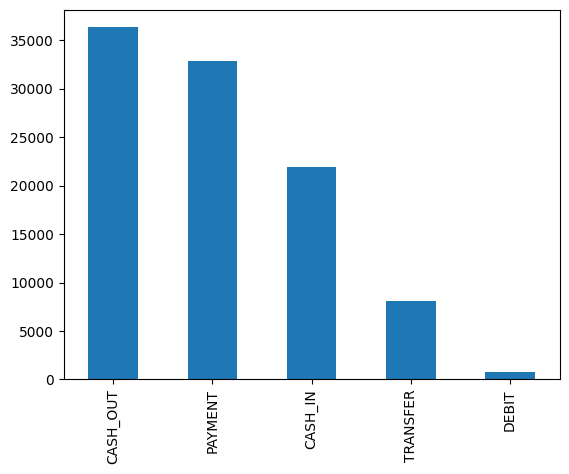

In [ ]:
# Checking for data in columns. Ok, fine.
print(sample["type"].unique())
sample["type"].value_counts().plot(kind = "bar")

In [ ]:
#gonna put type of payments into dummies style :)
sample_dummies = pd.get_dummies(sample["type"])

In [ ]:
sample = pd.concat([sample, sample_dummies], axis=1)

In [ ]:
sample.drop("type", axis=1, inplace = True)

In [ ]:
# Checking for data in columns. Can I drop these?
print(sample["nameDest"].nunique())
print(sample["nameOrig"].nunique())

62991
99995


In [ ]:
print(sample.dtypes)
## nameOrig and nameDest -- > objects. Not even thinking of using as features.

step                int64
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
isFlaggedFraud    float64
CASH_IN             uint8
CASH_OUT            uint8
DEBIT               uint8
PAYMENT             uint8
TRANSFER            uint8
dtype: object


In [ ]:
# Feature selection
numeric_columns = ["step", "amount", "oldbalanceOrg", "oldbalanceDest", "newbalanceDest", "isFraud", "CASH_IN", "CASH_OUT","DEBIT",
                   "PAYMENT", "TRANSFER"]

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# example in class with salaries dataset

corr=np.abs(sample[numeric_columns].corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

### Run a logisitc regression classifier and evaluate its accuracy.

In [ ]:
# define my X and y

# Assuming 'sample' is your original DataFrame
features = sample[["step", "amount", "oldbalanceOrg", "oldbalanceDest", "newbalanceDest", "CASH_IN", "CASH_OUT", "DEBIT", "PAYMENT", "TRANSFER"]]

#features = sample.drop(columns = ["isFraud", "nameOrig", "nameDest","newbalanceOrig"])
target = sample["isFraud"]

# Get the numeric and train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression

sample_model = LogisticRegression (max_iter = 4000) #used in class the same.
sample_model.fit(X_train, y_train)
sample_model.score(X_test, y_test)

print("accuracy_score is:", sample_model.score(X_test, y_test))

accuracy_score is: 0.99956


In [ ]:
# confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, classification_report

pred = sample_model.predict(X_test)
print("classification_report\n",classification_report(y_test, pred),"\n\nconfusion_matrix") # LOL - recall 1.00
confusion_matrix(y_true = y_test, y_pred = pred)

In [ ]:
# true negative  false positive
# false negative  true positive

### The thing is, this is super wrong and I would day it's because of our inbalanced sample [0 and 1's] ---> ### Over sampling

In [ ]:
train = pd.concat([X_train, y_train], axis=1) ### ONLY WITH THE TRAIN
print(train.shape)
# now, who is our minority and our majority class? Let's separate them
no_fraud = train[train["isFraud"] == 0]
yes_fraud = train[train["isFraud"] == 1]
print(no_fraud.shape)
print(yes_fraud.shape)
print("Holy guacamole!")

(75000, 11)
(74959, 11)
(41, 11)
Holy guacamole!


In [ ]:
from sklearn.utils import resample

yes_fraud_oversampled = resample(yes_fraud, # datapoints I want to resample
                                replace = True, # in oversampling always True
                                n_samples = len(no_fraud), # len of the majority class
                                random_state = 0)

# Let's check these babies now
print(yes_fraud_oversampled.shape)
print(no_fraud.shape)

(74959, 11)
(74959, 11)


In [ ]:
# And let's put them together now
train_oversampled = pd.concat([no_fraud, yes_fraud_oversampled])
train_oversampled.head()

# so we can divide again :D
# let's divided again
X_train_over = train_oversampled.drop(columns = ["isFraud"])
y_train_over = train_oversampled["isFraud"] # target here

In [ ]:
### Now let's test it:
sample_model = LogisticRegression (max_iter = 4000) #used in class the same.
sample_model.fit(X_train_over, y_train_over)
sample_model.score(X_test, y_test) #### just to test this
print("Accuracy_score is:", sample_model.score(X_test, y_test))
print("Not a great score, but probably more reliable!")

Accuracy_score is: 0.55584
Not a great score, but probably more reliable!


In [ ]:
pred = sample_model.predict(X_test)
print(classification_report(y_true = y_test, y_pred = pred)) ### Remember that we did not oversample the test, so it's y_test/y_pred

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, pred) #### not bad, hein?

### Now pick a model of your choice and evaluate its accuracy.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

sample_model = DecisionTreeClassifier(random_state = 1)
sample_model.fit(X_train_over, y_train_over)
print("Accuracy_score is:", sample_model.score(X_test, y_test))
# not good i think

Accuracy_score is: 0.99924


In [ ]:
pred = sample_model.predict(X_test)
print(classification_report(y_true = y_test, y_pred = pred)) ### Remember that we did not oversample the test, so it's y_test/y_pred
print("Recall score is:",recall_score(y_test, pred))

### Which model worked better and how do you know?

In [ ]:
## Just gonna open a ticket for this :D kkkkk

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.